# Соревнование по Регрессии (Линейные модели)

## Ссылка на соревнование

https://www.kaggle.com/competitions/urfu-engai-ml-2022-regression

## Целевая метрика

R^2 >= 0.7

## Dataset Description

**Файлы**  
* Train.csv - Тренировочный набор данных  
* Target.csv - Целевые значения для тренировочного набора данных  
* Test.csv - Тестовый набор данных  
* Submission.csv - пример файла для загрузки решения 
  
**Колонки**  
* 'code' - Уникальный код контролируемого определителя, определенный в списке кодов,  
* 'year' - Год, в течение которого были отобраны данные,  
* 'period' - Период года, в течение которого производилась выборка данных,  
* 'id' - Уникальный международный идентификатор водного объекта, в котором получены данные,  
* 'Country' - Информация о стране, созданная с использованием координат,  
* 'tourists' - Среднее количество туристов по стране в период с 1990 по 2020 год,  
* 'venue' - Количество предприятий рядом с указанными координатами,  
* 'rate' - Уровень грамотности в стране в период с 2010 по 2018 год,  
* 'food' - доля пищевых отходов,  
* 'glass' - доля стеклянных отходов,  
* 'metal' - доля металлических отходов,  
* 'other' - доля прочих отходов,  
* 'paper' - доля бумажных отходов,  
* 'plastic' - доля пластмассовых отходов,  
* 'leather' - доля кожаных отходов,  
* 'green_waste' - доля зеленых отходов,  
* 'waste_recycling' - доля перерабатываемого мусора

### Import библиотек

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

### Считываем файлы в DataFrame

**Тренировочная выборка**

In [3]:
df_train = pd.read_csv('./Data/Kaggle1/train.csv', delimiter = ',', index_col = 'index')
df_train.head(3)

,code,year,period,id,Country,population,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling
index,,,,,,,,,,,,,,,,,,
19,EEA_3161-01-1,2009,2009-01--2009-12,FRDR179,France,122.299437,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
20,EEA_3161-05-5,2009,2009-01--2009-12,FRDR179,France,122.299437,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
27,EEA_3161-01-1,2009,2009-01--2009-12,FRDR174,France,122.299437,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26


In [4]:
df_train.shape

(1979, 18)

**Целевые значения для тренировочной выборки**

In [5]:
target = pd.read_csv('./Data/Kaggle1/target.csv', delimiter = ',', index_col = 'index')
target.head(3)

,polution
index,
19,0.693147
20,0.218495
27,0.693147


**Объединим тренировочную выборку и ее целевые значения**

In [6]:
df_train = df_train.join(target, on='index')
df_train.head(3)

,code,year,period,id,Country,population,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
index,,,,,,,,,,,,,,,,,,,
19,EEA_3161-01-1,2009,2009-01--2009-12,FRDR179,France,122.299437,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.693147
20,EEA_3161-05-5,2009,2009-01--2009-12,FRDR179,France,122.299437,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.218495
27,EEA_3161-01-1,2009,2009-01--2009-12,FRDR174,France,122.299437,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.693147


In [7]:
df_train.shape

(1979, 19)

**Тестовая выборка**

In [8]:
df_test = pd.read_csv('./Data/Kaggle1/test.csv', delimiter = ',', index_col = 'index')
df_test.head(3)

,code,year,period,id,Country,population,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling
index,,,,,,,,,,,,,,,,,,
202,EEA_3161-05-5,2009,2009-01--2009-12,FRGR0362,France,122.299437,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
395,EEA_3161-03-3,2009,2009-01--2009-12,FRHR314,France,122.299437,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
725,EEA_3161-02-2,2008,2008-01--2008-12,FRHR77,France,122.299437,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26


In [9]:
df_test.shape

(220, 18)

### Первичный анализ данных

Типы данных в датасете

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 19 to 19915
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   code             1979 non-null   object 
 1   year             1979 non-null   int64  
 2   period           1979 non-null   object 
 3   id               1979 non-null   object 
 4   Country          1979 non-null   object 
 5   population       1979 non-null   float64
 6   tourists         1979 non-null   float64
 7   venue            1979 non-null   float64
 8   rate             1979 non-null   float64
 9   food             1979 non-null   float64
 10  glass            1979 non-null   float64
 11  metal            1979 non-null   float64
 12  other            1979 non-null   float64
 13  paper            1979 non-null   float64
 14  plastic          1979 non-null   float64
 15  leather          1979 non-null   float64
 16  green_waste      1979 non-null   float64
 17  waste_recycl

Разделим категориальные и числовые признаки датасета

In [11]:
c_names = df_train.columns
c_names

Index(['code', 'year', 'period', 'id', 'Country', 'population', 'tourists',
       'venue', 'rate', 'food', 'glass', 'metal', 'other', 'paper', 'plastic',
       'leather', 'green_waste', 'waste_recycling', 'polution'],
      dtype='object')

In [12]:
num_col = ['year', 'population', 'tourists',
       'venue', 'rate', 'food', 'glass', 'metal', 'other', 'paper', 'plastic',
       'leather', 'green_waste', 'waste_recycling', 'polution']

In [13]:
cat_col = ['code', 'period','id', 'Country']

Рассмотрим корреляцию числовых признаков

In [14]:
df_train[num_col].corr()

,year,population,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
year,1.000000,-0.412800,0.132751,-0.062286,0.247240,0.443651,0.327415,-0.171037,-0.240266,-0.021725,-0.429707,0.014008,-0.259481,-0.305375,-0.074210
population,-0.412800,1.000000,-0.435517,0.023243,-0.239989,-0.793378,-0.816516,0.060665,0.607628,-0.181184,0.889965,-0.088081,0.544438,0.636350,0.100029
tourists,0.132751,-0.435517,1.000000,-0.004159,-0.190285,0.268236,0.586081,-0.026153,0.196714,-0.116693,-0.463076,-0.283858,-0.634935,-0.516938,0.126834
venue,-0.062286,0.023243,-0.004159,1.000000,0.035017,0.001905,-0.040552,0.020352,-0.010616,-0.034054,0.042723,-0.018675,0.000002,-0.021712,-0.022175
rate,0.247240,-0.239989,-0.190285,0.035017,1.000000,0.739952,-0.089921,-0.022808,-0.700808,-0.467224,-0.096421,0.031483,-0.091336,-0.582026,-0.136771
food,0.443651,-0.793378,0.268236,0.001905,0.739952,1.000000,0.567159,-0.204677,-0.725303,-0.270066,-0.681400,0.140002,-0.536421,-0.800054,-0.112971
glass,0.327415,-0.816516,0.586081,-0.040552,-0.089921,0.567159,1.000000,-0.176876,-0.249098,0.013877,-0.837658,0.363399,-0.573615,-0.440904,0.011002
metal,-0.171037,0.060665,-0.026153,0.020352,-0.022808,-0.204677,-0.176876,1.000000,-0.181735,0.028275,0.276505,-0.144869,0.566480,0.051447,-0.018716
other,-0.240266,0.607628,0.196714,-0.010616,-0.700808,-0.725303,-0.249098,-0.181735,1.000000,-0.049474,0.394043,-0.261704,0.052210,0.448695,0.196187
paper,-0.021725,-0.181184,-0.116693,-0.034054,-0.467224,-0.270066,0.013877,0.028275,-0.049474,1.000000,-0.310956,-0.264008,0.158854,0.461342,-0.086761


In [15]:
main_num_col = ['population', 'tourists', 'rate', 'food', 'other']

Рассмотрим количественные переменные объединенного датасета

In [16]:
df_train.describe()

,year,population,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
count,1979.000000,1979.000000,1.979000e+03,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000
mean,2008.631127,135.378408,6.085057e+07,0.111673,8.735282,32.048873,8.986640,3.022840,24.775169,19.699151,10.014967,0.039616,0.452016,22.640623,1.042456
std,0.772611,60.808405,1.996584e+07,0.624864,25.879178,7.686625,2.686441,0.534799,5.175954,3.545121,3.599867,0.379301,1.557748,3.323414,0.641893
min,2006.000000,18.148547,5.300380e+05,0.000000,0.000000,14.180000,2.200000,1.380000,0.000000,6.100000,1.450000,0.000000,0.000000,0.760000,0.002497
25%,2008.000000,122.299437,5.094169e+07,0.000000,0.000000,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,22.260000,0.550070
50%,2009.000000,122.299437,7.117635e+07,0.000000,0.000000,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,22.260000,0.870368
75%,2009.000000,122.299437,7.117635e+07,0.000000,0.000000,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,22.260000,1.561003
max,2015.000000,377.379590,7.117635e+07,7.000000,87.158924,49.000000,21.400000,9.200000,44.050000,37.830000,20.200000,4.000000,15.330000,47.830000,3.323236


Целевая переменная

Text(0.5, 1.0, 'Target')

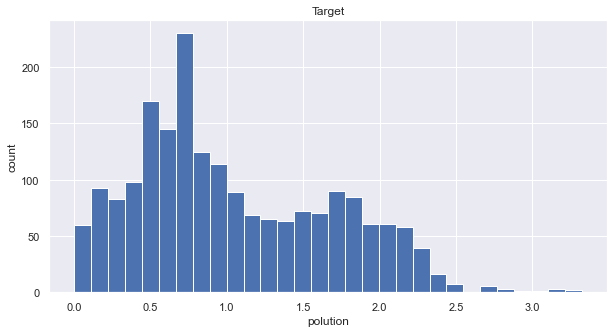

In [17]:
plt.figure(figsize = (10, 5))
target['polution'].hist(bins=30)
plt.ylabel('count')
plt.xlabel('polution')
plt.title('Target')

Проверим датасет на пропуски значений

In [18]:
df_train.isnull().sum()

code               0
year               0
period             0
id                 0
Country            0
population         0
tourists           0
venue              0
rate               0
food               0
glass              0
metal              0
other              0
paper              0
plastic            0
leather            0
green_waste        0
waste_recycling    0
polution           0
dtype: int64

Проверим количество уникальных значений столбца 'id' в тренировочной и тестовом датасетах и уберем из тренировочного те, которые не встречаются в тестовом

In [19]:
df_train['id'].nunique()

553

In [20]:
df_test['id'].nunique()

182

In [21]:
df = df_train

In [22]:
test_idlist = df_test['id'].unique()
test_idlist

array(['FRGR0362', 'FRHR314', 'FRHR77', 'FRB1R723', 'ES12118', 'FRCR151',
       'FRDR1060', 'FRDR172', 'FI81_064_001', 'FRGR0111', 'FRGR0126A',
       'UKSC020165', 'UKSC005603', 'UKSC005950', 'UKSC005010', 'FRGR0476',
       'UKSC020305', 'FRGR0456', 'FRGR0229', 'FRGR0062', 'FRGR0057',
       'FRDR110', 'FRGR0054', 'UKSC005202', 'FRCR132', 'FRGR0460C',
       'FRGR0520', 'ES030MSPF0920010', 'ES030MSPF0727010', 'FRCR78',
       'UKSC005220', 'FRGR0271A', 'FRGR0279', 'FRHR4-F0406000',
       'FRGR0144A', 'FRER33', 'FRGR0359A', 'FRDR196B', 'FRHR284',
       'FRFR158', 'FI14_923_Y01', 'FRCR225', 'FRFR215B', 'FRAR10',
       'FRGR2017', 'ES014MSPFES-014-NR-111-025-02-02', 'FRAR43',
       'FRDR130', 'FRFR228', 'FRGR0560', 'ES12117', 'RSNIS_3', 'FRDR277A',
       'FRAR04', 'ES030MSPF0712010', 'ES017MSPFES111R040010', 'FRDR182',
       'FRDR598', 'FRGR0545', 'FRFR281', 'FRDR211', 'FRFR296A', 'FRFR304',
       'FRDR203', 'FRFR611', 'FRFR242', 'FRB2R54', 'FRGR0007F', 'FRHR18',
       'FRHR32'

In [23]:
df_train = df_train.loc[df['id'].isin(test_idlist)]

In [24]:
df_train['id'].nunique()

182

Разобьем обратно тренировочную выбору на саму выборку и целевые значения

In [25]:
target = df_train['polution']

In [26]:
target.shape

(578,)

In [27]:
df_train = df_train.drop(['polution'], axis=1)

In [28]:
df_train.shape

(578, 18)

Постоим карту попарных зависимостей признаков

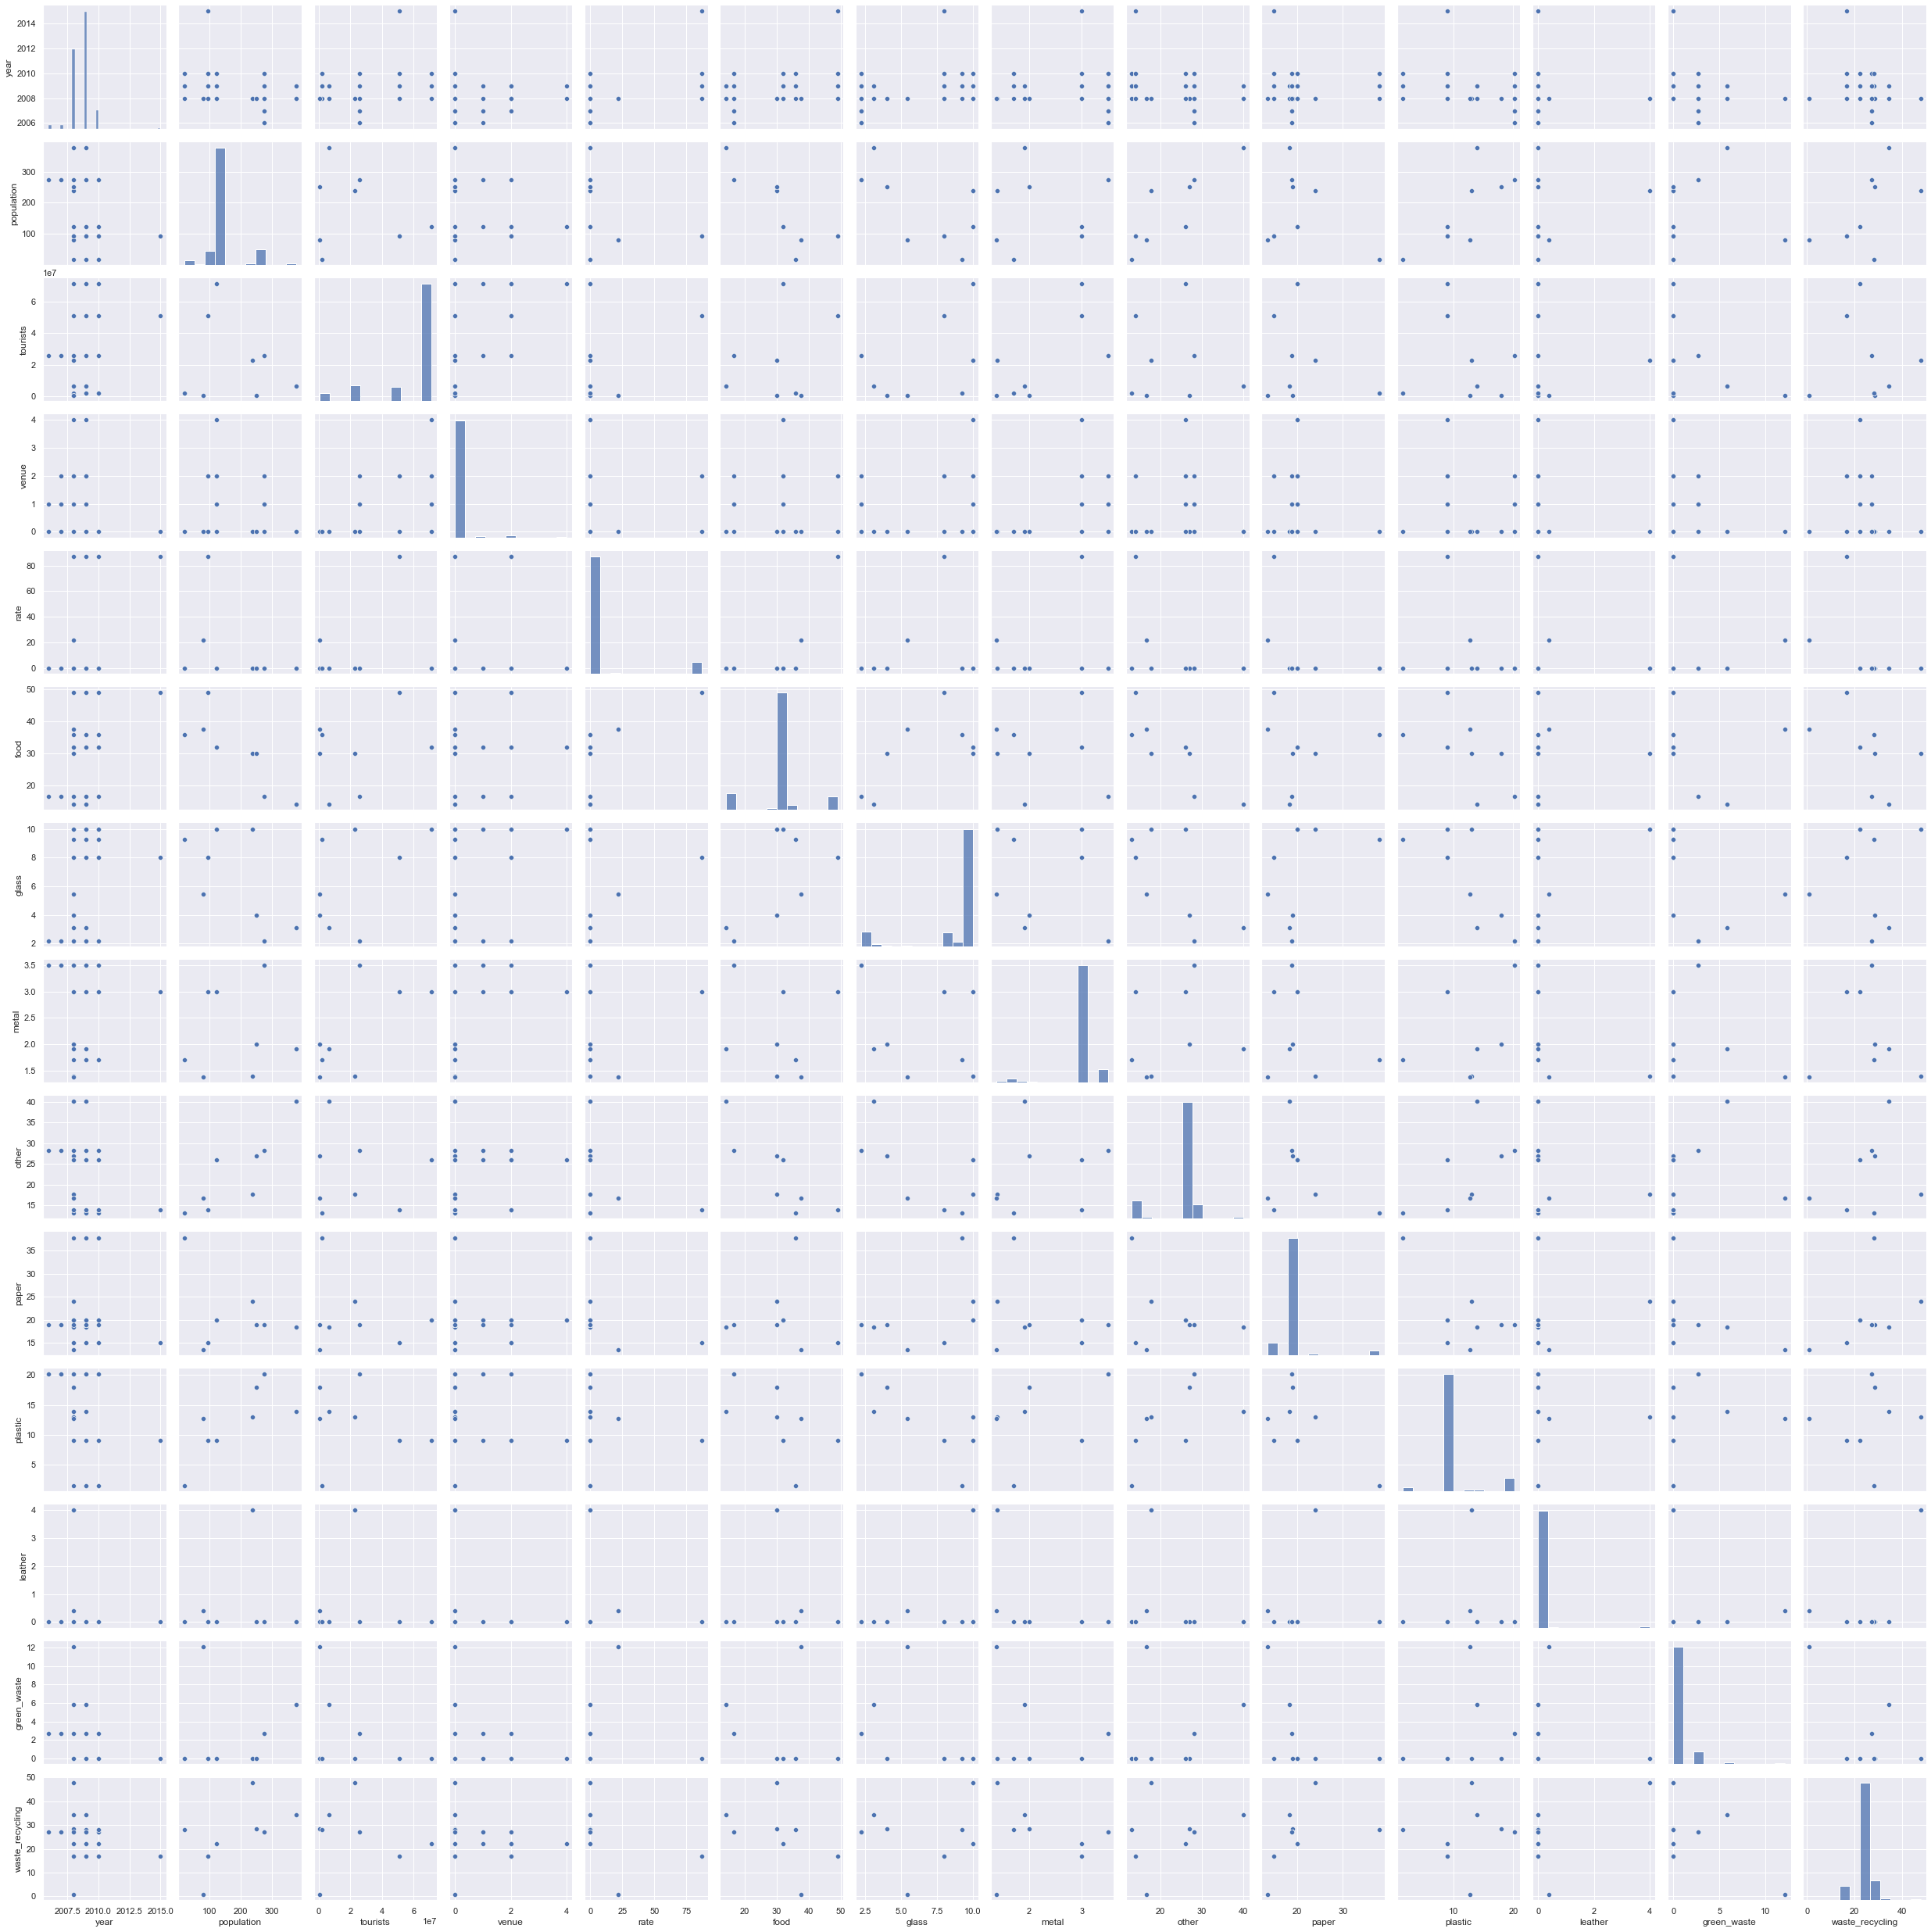

In [29]:
sns.pairplot(df_train)

In [30]:
# очень интересно, но непонятно

Посмотрим уникальные значения в каждом из столбцов датасета:

In [31]:
c_names = df_train.columns
c_names

Index(['code', 'year', 'period', 'id', 'Country', 'population', 'tourists',
       'venue', 'rate', 'food', 'glass', 'metal', 'other', 'paper', 'plastic',
       'leather', 'green_waste', 'waste_recycling'],
      dtype='object')

In [32]:
for x in c_names:
    print(f'Столбец "{x}": количество уникальных значений {df_train[x].nunique()}')

Столбец "code": количество уникальных значений 5
Столбец "year": количество уникальных значений 6
Столбец "period": количество уникальных значений 14
Столбец "id": количество уникальных значений 182
Столбец "Country": количество уникальных значений 8
Столбец "population": количество уникальных значений 8
Столбец "tourists": количество уникальных значений 8
Столбец "venue": количество уникальных значений 4
Столбец "rate": количество уникальных значений 3
Столбец "food": количество уникальных значений 7
Столбец "glass": количество уникальных значений 7
Столбец "metal": количество уникальных значений 7
Столбец "other": количество уникальных значений 8
Столбец "paper": количество уникальных значений 8
Столбец "plastic": количество уникальных значений 7
Столбец "leather": количество уникальных значений 3
Столбец "green_waste": количество уникальных значений 4
Столбец "waste_recycling": количество уникальных значений 8


In [33]:
# попробуем удалить столбцы "year" и/или "period"
# эксперименты показали, что наилучший результат с т.з. метрик даст удаление только столбца 'period

In [34]:
col_drop = []

Уберем признак 'period' как повторяющих признак 'year' и снижающий результаты моделирования (подсчитано перед тем как его убрать)

In [35]:
col_drop.append('period')

In [36]:
col_drop

['period']

Проверим столбцы, имеющие одинаковое количество значений:

In [37]:
# 11 значений
test_col = ['Country', 
            'population', 
            'tourists', 
            'other', 
            'paper', 
            'waste_recycling']

In [38]:
for x in df_train[test_col[0]].unique():
    print(f'Страна - "{x}", количество различных значений по колонкам:')
    for y in test_col[1:]:
        print(f'   {y} - {df_train[df_train["Country"] == x][y].nunique()}')

Страна - "France", количество различных значений по колонкам:
   population - 1
   tourists - 1
   other - 1
   paper - 1
   waste_recycling - 1
Страна - "Spain", количество различных значений по колонкам:
   population - 1
   tourists - 1
   other - 1
   paper - 1
   waste_recycling - 1
Страна - "United Kingdom", количество различных значений по колонкам:
   population - 1
   tourists - 1
   other - 1
   paper - 1
   waste_recycling - 1
Страна - "Germany", количество различных значений по колонкам:
   population - 1
   tourists - 1
   other - 1
   paper - 1
   waste_recycling - 1
Страна - "Belgium", количество различных значений по колонкам:
   population - 1
   tourists - 1
   other - 1
   paper - 1
   waste_recycling - 1
Страна - "Finland", количество различных значений по колонкам:
   population - 1
   tourists - 1
   other - 1
   paper - 1
   waste_recycling - 1
Страна - "Serbia", количество различных значений по колонкам:
   population - 1
   tourists - 1
   other - 1
   paper - 

In [39]:
# вывод избыточные столбцы можно удалить
# второй вывод, как оказалдось эти столбцы влияют на результат валидации, поэтому часть (чмсловые) оставляем

In [40]:
col_drop.append('Country')

In [41]:
# 10 значений
test_col = ["food",'other', "plastic","metal","glass",'paper', 'leather', 'green_waste', 'waste_recycling']

In [42]:
for x in df_train[test_col[0]].unique():
    print(f'Для значения  "food", равного "{x}", количество различных значений по колонкам:')
    for y in test_col[1:]:
        print(f'   {y} - {df_train[df_train["food"] == x][y].nunique()}')

Для значения  "food", равного "32.0", количество различных значений по колонкам:
   other - 1
   plastic - 1
   metal - 1
   glass - 1
   paper - 1
   leather - 1
   green_waste - 1
   waste_recycling - 1
Для значения  "food", равного "49.0", количество различных значений по колонкам:
   other - 1
   plastic - 1
   metal - 1
   glass - 1
   paper - 1
   leather - 1
   green_waste - 1
   waste_recycling - 1
Для значения  "food", равного "16.7", количество различных значений по колонкам:
   other - 1
   plastic - 1
   metal - 1
   glass - 1
   paper - 1
   leather - 1
   green_waste - 1
   waste_recycling - 1
Для значения  "food", равного "30.0", количество различных значений по колонкам:
   other - 2
   plastic - 2
   metal - 2
   glass - 2
   paper - 2
   leather - 2
   green_waste - 1
   waste_recycling - 2
Для значения  "food", равного "14.18", количество различных значений по колонкам:
   other - 1
   plastic - 1
   metal - 1
   glass - 1
   paper - 1
   leather - 1
   green_waste -

In [43]:
# вывод эти избыточные столбцы тоже удаляем

In [44]:
df_train[df_train["food"] == 30.0]['plastic'].value_counts()

13.0    5
18.0    2
Name: plastic, dtype: int64

Т.к. мы видим, что все значения столбцов при одном значении параметра 'food' одинаковы, кроме как при значении данного столбца 30.0, то мы преобразуем их на условные '500' и '1000'. Все равно они потом преобразуются как категории.

In [45]:
df_train['food'] = np.where((df_train['food']==30.0) & (df_train['plastic']== 13.0), 500, df_train['food'])
df_train['food'] = np.where((df_train['food']==30.0) & (df_train['plastic']== 18.0), 1000, df_train['food'])

In [46]:
df_train["food"].value_counts()

32.00      437
16.70       55
49.00       52
35.88       18
14.18        7
500.00       5
37.62        2
1000.00      2
Name: food, dtype: int64

Уберем остальные дублирующие колонки

In [47]:
col_drop.extend(test_col[2:])

In [48]:
# 5 значений
# test_col = ["code","green_waste","rate"]
# здесь решение "в лоб" не прошло, но возьмем данные колонки на заметку

Проверим значения столбцов 'venue', 'rate', 'food', 'leather', 'green_waste'

In [49]:
col_list = ['venue', 'rate', 'food', 'other']

In [50]:
for x in col_list:
    print(x)
    print(df_train[x].value_counts())
    print('-'*50)

venue
0.0    562
2.0      9
1.0      5
4.0      2
Name: venue, dtype: int64
--------------------------------------------------
rate
0.000000     524
87.158924     52
21.867102      2
Name: rate, dtype: int64
--------------------------------------------------
food
32.00      437
16.70       55
49.00       52
35.88       18
14.18        7
500.00       5
37.62        2
1000.00      2
Name: food, dtype: int64
--------------------------------------------------
other
26.00    437
28.20     55
14.00     52
13.13     18
40.14      7
17.70      5
16.72      2
27.00      2
Name: other, dtype: int64
--------------------------------------------------


### Объединяем тренировочную и тестовую выборки, чтобы не делать работу 2 раза

In [51]:
df_total = pd.concat([df_train, df_test])

In [52]:
df_total = df_total.drop(col_drop, axis=1)
df_total.head(3)

,code,year,id,population,tourists,venue,rate,food,other
index,,,,,,,,,
116,EEA_3161-03-3,2008,FRGR0543,122.299437,71176346.0,0.0,0.0,32.0,26.0
117,EEA_3161-05-5,2008,FRGR0543,122.299437,71176346.0,2.0,0.0,32.0,26.0
135,EEA_3161-05-5,2008,FRGR0543,122.299437,71176346.0,0.0,0.0,32.0,26.0


### Применяем one-hot-encoding для категориальных столбцов "id", "code", "year"

In [53]:
df_total = pd.concat([df_total, pd.get_dummies(df_total.id, prefix='id_')], axis=1, sort=False)  
df_total = df_total.drop(['id'], axis=1)
df_total = pd.concat([df_total, pd.get_dummies(df_total.code, prefix='code_')], axis=1, sort=False)  
df_total = df_total.drop(['code'], axis=1)
df_total = pd.concat([df_total, pd.get_dummies(df_total.year, prefix='year_')], axis=1, sort=False)  
df_total = df_total.drop(['year'], axis=1)
df_total.head()

,population,tourists,venue,rate,food,other,id__BERW06_ML06R,id__BERW06_ML12R,id__BERW06_VE18R,id__ES014MSPFES-014-NR-111-025-02-02,...,code__EEA_3161-02-2,code__EEA_3161-03-3,code__EEA_3161-05-5,code__EEA_31615-01-7,year__2006,year__2007,year__2008,year__2009,year__2010,year__2015
index,,,,,,,,,,,,,,,,,,,,,
116,122.299437,71176346.0,0.0,0.0,32.0,26.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
117,122.299437,71176346.0,2.0,0.0,32.0,26.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
135,122.299437,71176346.0,0.0,0.0,32.0,26.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
136,122.299437,71176346.0,0.0,0.0,32.0,26.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
139,122.299437,71176346.0,2.0,0.0,32.0,26.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


### Применяем one-hot-encoding для столбцов 'venue', 'rate', 'food'

In [54]:
df_total = pd.concat([df_total, pd.get_dummies(df_total.venue, prefix='venue_')], axis=1, sort=False)  
df_total = df_total.drop(['venue'], axis=1)
df_total = pd.concat([df_total, pd.get_dummies(df_total.rate, prefix='rate_')], axis=1, sort=False)  
df_total = df_total.drop(['rate'], axis=1)
df_total = pd.concat([df_total, pd.get_dummies(df_total.food, prefix='food_')], axis=1, sort=False)  
df_total = df_total.drop(['food'], axis=1)
df_total.head()

,population,tourists,other,id__BERW06_ML06R,id__BERW06_ML12R,id__BERW06_VE18R,id__ES014MSPFES-014-NR-111-025-02-02,id__ES014MSPFES-014-NR-163-000-02-00,id__ES014MSPFES-014-NR-204-000-03-00,id__ES017MSPFES111R040010,...,rate__87.15892367892796,food__14.18,food__16.7,food__30.0,food__32.0,food__35.88,food__37.62,food__49.0,food__500.0,food__1000.0
index,,,,,,,,,,,,,,,,,,,,,
116,122.299437,71176346.0,26.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
117,122.299437,71176346.0,26.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
135,122.299437,71176346.0,26.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
136,122.299437,71176346.0,26.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
139,122.299437,71176346.0,26.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [55]:
col_names = df_total.columns
col_names

Index(['population', 'tourists', 'other', 'id__BERW06_ML06R',
       'id__BERW06_ML12R', 'id__BERW06_VE18R',
       'id__ES014MSPFES-014-NR-111-025-02-02',
       'id__ES014MSPFES-014-NR-163-000-02-00',
       'id__ES014MSPFES-014-NR-204-000-03-00', 'id__ES017MSPFES111R040010',
       ...
       'rate__87.15892367892796', 'food__14.18', 'food__16.7', 'food__30.0',
       'food__32.0', 'food__35.88', 'food__37.62', 'food__49.0', 'food__500.0',
       'food__1000.0'],
      dtype='object', length=212)

### Применим нормализацию числовых значений датасета

In [56]:
scaler  = MinMaxScaler()
scaler.fit_transform(df_total)
df_total = scaler.transform(df_total) 

In [57]:
df_total = pd.DataFrame(df_total, columns=col_names)
df_total.head(3)

,population,tourists,other,id__BERW06_ML06R,id__BERW06_ML12R,id__BERW06_VE18R,id__ES014MSPFES-014-NR-111-025-02-02,id__ES014MSPFES-014-NR-163-000-02-00,id__ES014MSPFES-014-NR-204-000-03-00,id__ES017MSPFES111R040010,...,rate__87.15892367892796,food__14.18,food__16.7,food__30.0,food__32.0,food__35.88,food__37.62,food__49.0,food__500.0,food__1000.0
0,0.289927,1.0,0.47649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.289927,1.0,0.47649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.289927,1.0,0.47649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Разбиваем данные обратно на Тренировочную и Тестовую

In [58]:
train = df_total.iloc[0:df_train.shape[0],:]
test = df_total.iloc[df_train.shape[0]:,:]

In [59]:
df_train.shape[0], train.shape[0], df_test.shape[0], test.shape[0], 

(578, 578, 220, 220)

### Разобьем тренировочную выборку на тренировочную и валидационную и обучим модель линейной регрессии

In [60]:
X = train
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [61]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [62]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape 

((387, 212), (191, 212), (387,), (191,))

### Построим моделт линейной регрессии "из коробки"

In [63]:
%%time

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_val_pred = model_lr.predict(X_val)

Wall time: 57.7 ms


In [64]:
r2(y_train, y_train_pred)

0.7311668177255848

In [65]:
r2(y_val, y_val_pred)

-1.3064852433206151e+25

*Вывод: т.к. результат целевой переменной на валидационной выборке резко упал, то будем применять регуляризацию и вероятно введем полиномиальную зависимость*

### Применим регуляризацию L1 и L2 к данным

In [66]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

**lasso**

In [67]:
alpha=0.00067

In [68]:
%%time

model_lasso = Lasso(alpha=alpha,max_iter=10000)

model_lasso.fit(X_train, y_train)

Wall time: 123 ms


Lasso(alpha=0.00067, max_iter=10000)

In [69]:
y_train_pred = model_lasso.predict(X_train)
y_val_pred = model_lasso.predict(X_val)

In [70]:
r2(y_train, y_train_pred)

0.8545420404005993

In [71]:
r2(y_val, y_val_pred)

0.6134293247721807

In [72]:
#alpha=[0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
#alpha=[0.00065, 0.00066, 0.00067, 0.00068, 0.00069]

#for it in alpha:
#    model_lasso = Lasso(alpha=it,max_iter=10000)
#    model_lasso.fit(X_train, y_train)
#    y_train_pred = model_lasso.predict(X_train)
#    y_val_pred = model_lasso.predict(X_val)
#    print(f'Для альфа, равного {it}:')
#    print(f'   r2_train: {r2(y_train, y_train_pred)}')
#    print(f'   r2_val: {r2(y_val, y_val_pred)}')
#    print('_'*50)

**ridge**

In [73]:
alpha=0.59

In [74]:
#%%time

#model_ridge = Ridge(alpha=alpha,fit_intercept=False, max_iter=1000, solver='фгещ', random_state=42)
#model_ridge.fit(X_train, y_train)

In [75]:
%%time

model_ridge = Ridge(alpha=alpha,max_iter=10000)
model_ridge.fit(X_train, y_train)

Wall time: 12.1 ms


Ridge(alpha=0.59, max_iter=10000)

In [76]:
y_train_pred = model_ridge.predict(X_train)
y_val_pred = model_ridge.predict(X_val)

In [77]:
r2(y_train, y_train_pred)

0.8532604335439162

In [78]:
r2(y_val, y_val_pred)

0.6276023129348407

*Вывод: результат регуляризации ridge лучше, будем использовать его*

**Подберем макропараметр для регуляризации**

In [79]:
#alpha=[0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
alpha=[0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64]
#solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
for it in alpha:
    model_ridge = Ridge(alpha=it,max_iter=10000)
    model_ridge.fit(X_train, y_train)
    y_train_pred = model_ridge.predict(X_train)
    y_val_pred = model_ridge.predict(X_val)
    print(f'Для альфа, равного {it}:')
    print(f'   r2_train: {r2(y_train, y_train_pred)}')
    print(f'   r2_val: {r2(y_val, y_val_pred)}')
    print('_'*50)

Для альфа, равного 0.56:
   r2_train: 0.8559614239292865
   r2_val: 0.627527877076698
__________________________________________________
Для альфа, равного 0.57:
   r2_train: 0.8550627392357939
   r2_val: 0.6275687605864966
__________________________________________________
Для альфа, равного 0.58:
   r2_train: 0.854162356968712
   r2_val: 0.6275933822199489
__________________________________________________
Для альфа, равного 0.59:
   r2_train: 0.8532604335439162
   r2_val: 0.6276023129348407
__________________________________________________
Для альфа, равного 0.6:
   r2_train: 0.8523571190315347
   r2_val: 0.6275961016709073
__________________________________________________
Для альфа, равного 0.61:
   r2_train: 0.8514525574367277
   r2_val: 0.6275752763502358
__________________________________________________
Для альфа, равного 0.62:
   r2_train: 0.8505468869660102
   r2_val: 0.6275403448242876
__________________________________________________
Для альфа, равного 0.63:
   r2_train:

### Усложним используемое семейство алгоритмов до кубической зависимости

In [80]:
alpha=0.59

In [81]:
%%time
model_ridge = Ridge(alpha=alpha,max_iter=10000)

Wall time: 0 ns


In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# создадим новую кубическую модель
# полином большей степени не получилось сделать из-за объема памяти выходит ошибка и в колабе и на моем железе
# MemoryError: Unable to allocate 284. GiB for an array with shape (387, 98491965) and data type float64
third_degree_regressor = make_pipeline(PolynomialFeatures(degree=3), model_ridge)

In [83]:
# обучим ее
third_degree_regressor.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge(alpha=0.59, max_iter=10000))])

In [84]:
y_train_pred = third_degree_regressor.predict(X_train)
y_val_pred = third_degree_regressor.predict(X_val)

In [85]:
r2(y_train, y_train_pred)

0.9974455089895203

In [86]:
r2(y_val, y_val_pred)

0.6368476357073269

### Обучаем на лучшей из полученных моделей тестовую выборку

In [87]:
y_test = third_degree_regressor.predict(test)

In [88]:
test_col_drop = df_test.columns

In [89]:
test_col_drop

Index(['code', 'year', 'period', 'id', 'Country', 'population', 'tourists',
       'venue', 'rate', 'food', 'glass', 'metal', 'other', 'paper', 'plastic',
       'leather', 'green_waste', 'waste_recycling'],
      dtype='object')

In [90]:
df_test['polution'] = y_test

In [91]:
df_test = df_test.drop(test_col_drop, axis=1)
df_test.head(3)

,polution
index,
202,1.402486
395,0.315973
725,1.375279


In [92]:
### Сохранение результатов прогнозирования

In [93]:
df_test.to_csv('RIM120906_PopovMV_kaggle1_final.csv', index = True)

In [94]:
# leaderboard: 0.67569